In [1]:
import os
import sys
import numpy as np
import scipy
from scipy.io import loadmat, savemat
import pandas as pd 

import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
x=loadmat('MPC.mat') #load

In [3]:
x

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Jul 15 09:21:16 2021',
 '__version__': '1.0',
 '__globals__': [],
 'MPC': array([[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],
 
        [[0.        , 2.09883251, 2.00822544, ..., 1.38637294,
          0.99581367, 0.        ],
         [2.09883251, 0.        , 1.4286822 , ..., 1.7122461 ,
          0.73134047, 0.        ],
         [2.00822544, 1.4286822 , 0.        , ..., 0.9

In [4]:
x.keys()

dict_keys(['__header__', '__version__', '__globals__', 'MPC'])

In [5]:
print(np.shape(x['MPC'])) 
print(np.shape(x['MPC'][0]))
#x['MPC'] is 400 x 400 mpc matrix of 1206 subjects concatenated together

(1206, 400, 400)
(400, 400)


In [6]:
idx=7
x['MPC'][idx]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

0.0


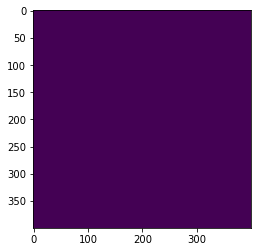

0.0


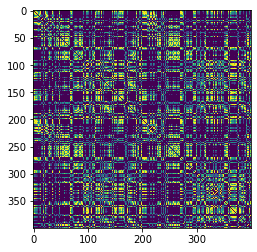

0.0


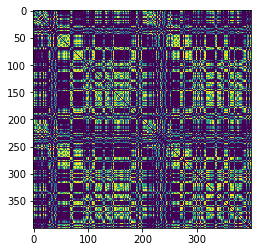

0.0


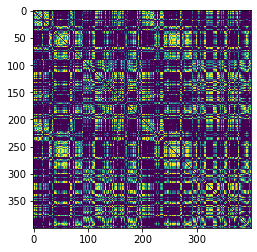

0.0


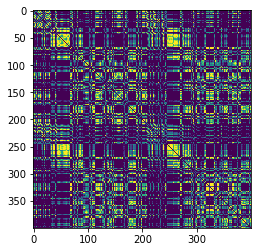

0.0


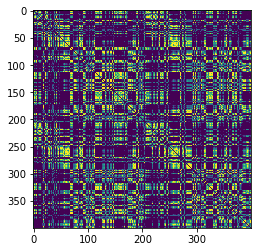

0.0


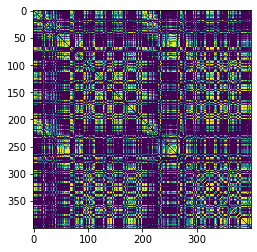

0.0


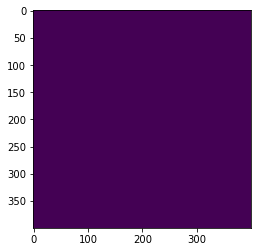

0.0


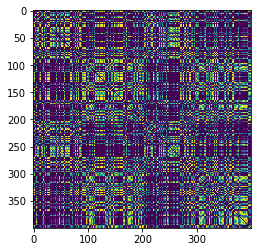

0.0


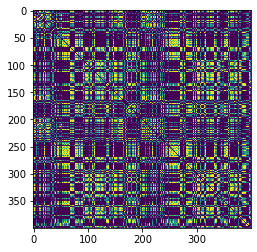

In [7]:
for idx in range(0,10): #check out some matrices
    print(np.min(x['MPC'][idx]))
    plt.imshow(x['MPC'][idx],vmin=0,vmax=2)
    plt.show()

In [8]:
#how many of the 1206 have an mpc matrix
empty_ids=[]
for idx in range(0,1206):
    u = np.sum(x['MPC'][idx])
    if u == 0:
        empty_ids.append(idx)
len(empty_ids) #113 subjects have MPC = 0 in all elements

113

In [9]:
#how many of the 1206 have an mpc matrix
non_empty_idx=[]
for idx in range(0,1206):
    u = np.sum(x['MPC'][idx])
    if u > 0:
        non_empty_idx.append(idx)
len(non_empty_idx) #1093 subjects have non zero MPC data

1093

In [10]:
empty_ids

[0,
 7,
 10,
 26,
 35,
 40,
 44,
 50,
 89,
 115,
 124,
 134,
 180,
 182,
 184,
 196,
 203,
 204,
 227,
 232,
 264,
 272,
 292,
 317,
 345,
 413,
 431,
 453,
 462,
 472,
 479,
 483,
 488,
 506,
 514,
 522,
 533,
 542,
 556,
 567,
 581,
 586,
 596,
 606,
 608,
 612,
 620,
 630,
 633,
 653,
 692,
 708,
 710,
 721,
 722,
 737,
 739,
 749,
 750,
 769,
 771,
 785,
 790,
 797,
 811,
 817,
 824,
 844,
 852,
 854,
 871,
 878,
 881,
 887,
 889,
 929,
 938,
 939,
 940,
 949,
 979,
 982,
 990,
 993,
 998,
 1013,
 1017,
 1019,
 1023,
 1025,
 1026,
 1032,
 1043,
 1051,
 1055,
 1068,
 1075,
 1080,
 1082,
 1094,
 1103,
 1114,
 1119,
 1122,
 1128,
 1154,
 1155,
 1158,
 1169,
 1172,
 1176,
 1180,
 1189]

In [19]:
x['MPC'][272]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
#which subject ids are empty, which have mpc data
df = pd.read_csv('../../raw_data/unrestricted_patelmo6_8_19_2021_8_21_44.csv')
df

,Subject,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
0,100004,S900,Q06,M,22-25,False,0,0,0,0.0,...,5.2,101.12,86.45,2.0,45.9,107.17,105.31,1.80,0.0,1.80
1,100206,S900,Q11,M,26-30,True,1,1,4,100.0,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
2,100307,Q1,Q01,F,26-30,True,1,1,4,100.0,...,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
3,100408,Q3,Q03,M,31-35,True,1,1,4,100.0,...,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
4,100610,S900,Q08,M,26-30,True,2,1,4,100.0,...,2.0,122.25,110.45,0.0,38.6,84.84,85.31,1.92,1.0,1.88
5,101006,S500,Q06,F,31-35,True,2,2,4,100.0,...,6.0,122.25,111.41,0.0,38.6,123.80,123.31,1.80,0.0,1.80
6,101107,S500,Q06,M,22-25,True,2,2,4,100.0,...,6.8,108.79,97.19,1.0,50.1,134.65,131.38,1.84,0.0,1.84
7,101208,S1200,Q12,F,31-35,False,0,0,0,0.0,...,4.4,101.12,87.11,1.0,50.1,105.57,102.32,1.92,0.0,1.92
8,101309,S500,Q06,M,26-30,True,1,1,4,100.0,...,5.2,122.25,110.45,0.0,38.6,106.39,104.39,1.80,0.0,1.80
9,101410,S500,Q06,M,26-30,False,2,1,2,50.0,...,6.8,122.25,111.41,3.0,50.1,73.86,71.78,1.80,0.0,1.80


In [15]:
all_subjects = df['Subject'].values
#all_subjects.dtype
all_subjects[empty_ids]

array([100004, 101208, 101612, 104113, 106218, 107119, 107523, 108525,
       116322, 120818, 122519, 124321, 132320, 133221, 133726, 135427,
       136328, 136530, 140723, 141624, 148234, 149741, 152932, 157235,
       162834, 175944, 179043, 184642, 186242, 188246, 189551, 190940,
       191639, 194948, 196548, 197954, 199554, 200816, 204117, 206323,
       208832, 209834, 211518, 212520, 212924, 214019, 218128, 230926,
       235128, 263032, 314225, 341733, 341935, 354439, 354944, 370740,
       373039, 382545, 384448, 398964, 403628, 435136, 446545, 457045,
       481143, 497764, 512835, 537952, 550035, 551138, 564046, 569864,
       571043, 574958, 577762, 620333, 630134, 632037, 632845, 646048,
       687062, 689369, 696063, 701535, 707244, 729355, 733548, 734247,
       743248, 745555, 748056, 751550, 766563, 782157, 786569, 810439,
       816855, 822850, 825351, 837863, 856463, 871964, 876873, 878574,
       884973, 912548, 915554, 919158, 940553, 946666, 953764, 959069,
      

In [18]:
empty_ids

[0,
 7,
 10,
 26,
 35,
 40,
 44,
 50,
 89,
 115,
 124,
 134,
 180,
 182,
 184,
 196,
 203,
 204,
 227,
 232,
 264,
 272,
 292,
 317,
 345,
 413,
 431,
 453,
 462,
 472,
 479,
 483,
 488,
 506,
 514,
 522,
 533,
 542,
 556,
 567,
 581,
 586,
 596,
 606,
 608,
 612,
 620,
 630,
 633,
 653,
 692,
 708,
 710,
 721,
 722,
 737,
 739,
 749,
 750,
 769,
 771,
 785,
 790,
 797,
 811,
 817,
 824,
 844,
 852,
 854,
 871,
 878,
 881,
 887,
 889,
 929,
 938,
 939,
 940,
 949,
 979,
 982,
 990,
 993,
 998,
 1013,
 1017,
 1019,
 1023,
 1025,
 1026,
 1032,
 1043,
 1051,
 1055,
 1068,
 1075,
 1080,
 1082,
 1094,
 1103,
 1114,
 1119,
 1122,
 1128,
 1154,
 1155,
 1158,
 1169,
 1172,
 1176,
 1180,
 1189]

In [17]:
np.where(all_subjects==149741)

(array([272]),)